# Important People

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
path_chungus = 'C:/Users/Jack/flatiron/module-01/mod-1-project/data/unzipped_data/chungus_with_tmdb.csv'
df = pd.read_csv(path_chungus, index_col=0)

In [3]:
#Create new variable based on the ROI of a movie:
df['net_roi'] = (df['worldwide_gross'] - df['production_budget']) / df['production_budget']

## Directors

In [4]:
# look at the shape of directors
df['director_1'].value_counts().describe()

count    94754.000000
mean         1.484803
std          1.328484
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         62.000000
Name: director_1, dtype: float64

### Directors and Gross

In [5]:
# drop gross NaN's
df_valid_gross = df.dropna(subset=['worldwide_gross'])
# check resulting length
len(df_valid_gross)

3950

In [6]:
# get rid of directors without multiple films
df_directors = df_valid_gross[df_valid_gross.duplicated('director_1') 
                             | df_valid_gross.duplicated('director_1', keep='last')]
# verify that all single-film directors are removed
df_directors['director_1'].value_counts()

nm0000229    8
nm0000142    8
nm0337773    7
nm0000631    6
nm0000916    6
            ..
nm1226871    2
nm8286012    2
nm1047180    2
nm0970447    2
nm0649117    2
Name: director_1, Length: 508, dtype: int64

In [7]:
# take a look at how many films a median director does
df_directors['director_1'].value_counts().describe()

count    508.000000
mean       2.580709
std        0.978760
min        2.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: director_1, dtype: float64

In [8]:

# group directors and get median worldwide_gross
dft = df_directors[['director_1', 'worldwide_gross']].groupby(['director_1']).median().sort_values('worldwide_gross', ascending=False)

# dft[(dft['worldwide_gross'] < 1) & (dft['worldwide_gross'] > -1)].sort_values('worldwide_gross', ascending=False)['worldwide_gross'].to_list()

# flatten dft
dft = dft.reset_index()

# exclude anomolous 'home' movie
# dft = dft[(dft['worldwide_gross'] < 88)]

# isolate the top 3 directors
dft = dft[0:3]

# add the typical director based on median
observation_typical_director = {'director_1': 'Typical', 
                                'worldwide_gross': df['worldwide_gross'].median()}

#append row to the dataframe
dft = dft.append(observation_typical_director, ignore_index=True)

# map id's to names pulled from web
id_to_name = {'nm0751577': 'Joe Russo', 'nm0005222': 'Sam Mendes', 'nm1853544': 'Pierre Coffin'}
dft = dft.replace({'director_1': id_to_name})


# verify it makes sense
display(dft)

,director_1,worldwide_gross
0,Joe Russo,1.140069e+09
1,Sam Mendes,9.950740e+08
2,Pierre Coffin,9.752168e+08
3,Typical,2.443883e+07


Text(0, 0.5, 'World Gross (billions, USD)')

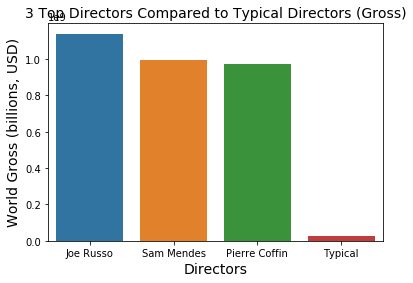

In [9]:
sns.barplot(x='director_1', y='worldwide_gross', data=dft.head())
plt.title('3 Top Directors Compared to Typical Directors (Gross)', fontsize=14)
plt.xlabel("Directors", fontsize=14)
plt.ylabel("World Gross (billions, USD)", fontsize=14)

In [10]:
# Sanity check
# col = 'director_1'
# for person in dft[col]:
#     display(df[df[col] == person])

### Directors and ROI

In [11]:
# drop net_roi NaN's
df_valid_rois = df.dropna(subset=['net_roi'])
# check resulting length
len(df_valid_rois)

3950

In [12]:
# get rid of directors without multiple films
df_directors = df_valid_rois[df_valid_rois.duplicated('director_1') 
                             | df_valid_rois.duplicated('director_1', keep='last')]
# verify that all single-film directors are removed
df_directors['director_1'].value_counts()

nm0000229    8
nm0000142    8
nm0337773    7
nm0000631    6
nm0000916    6
            ..
nm1226871    2
nm8286012    2
nm1047180    2
nm0970447    2
nm0649117    2
Name: director_1, Length: 508, dtype: int64

In [13]:
# take a look at how many films a median director does
df_directors['director_1'].value_counts().describe()

count    508.000000
mean       2.580709
std        0.978760
min        2.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: director_1, dtype: float64

Looks like 2 movies is a typical number of movies

In [14]:

# group directors and get median net_roi
dft = df_directors[['director_1', 'net_roi']].groupby(['director_1']).median().sort_values('net_roi', ascending=False)

# dft[(dft['net_roi'] < 1) & (dft['net_roi'] > -1)].sort_values('net_roi', ascending=False)['net_roi'].to_list()

# flatten dft
dft = dft.reset_index()

# exclude anomolous 'home' movie
dft = dft[(dft['net_roi'] < 88)]

# isolate the top 3 directors
dft = dft[0:3]

# add the typical director based on median
observation_typical_director = {'director_1': 'Typical', 
                                'net_roi': df['net_roi'].median()}

#append row to the dataframe
dft = dft.append(observation_typical_director, ignore_index=True)


# map id's to names pulled from web
id_to_name = {'nm0068587': 'William Brent Bell', 'nm0134224': 'Kay Cannon', 'nm1443502': 'Jordan Peele'}
dft = dft.replace({'director_1': id_to_name})

# verify it makes sense
display(dft)

,director_1,net_roi
0,William Brent Bell,53.290793
1,Kay Cannon,46.685970
2,Jordan Peele,30.892053
3,Typical,0.486775


Text(0, 0.5, 'ROI')

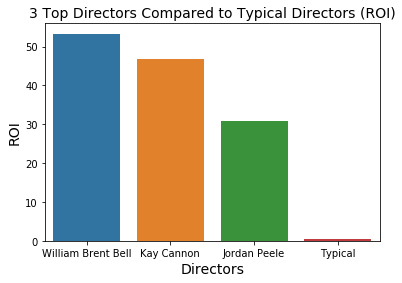

In [15]:
sns.barplot(x='director_1', y='net_roi', data=dft.head())
plt.title('3 Top Directors Compared to Typical Directors (ROI)', fontsize=14)
plt.xlabel("Directors", fontsize=14)
plt.ylabel("ROI", fontsize=14)